## DEGRADATION AND VALIDATION OF CASA MEASURES

In [29]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# ground thruth data
data_gt_dir = 'data/final_analysis_gt.json'
# tracker data
data_tr_dir = 'data/final_analysis_tracker.json'

In [31]:
data_gt = json.load(open(data_gt_dir, 'r'))
data_tr = json.load(open(data_tr_dir, 'r'))

freqs = list(data_gt.keys())
freqs.sort(key=int)

measures = list(data_gt[freqs[0]].keys())

mse_error = []
relative_error = []

for measure in measures:
    m = []
    r = []
    for f in freqs:
        if measure not in measures:
            measures.append(measure)
        values_gt = np.array(data_gt[f][measure])
        values_tr = np.array(data_tr[f][measure])
        num_datasets = len(values_gt)
        mse = np.sqrt(np.mean((values_gt - values_tr)**2))
        relative = (np.mean(np.abs(values_gt - values_tr)/(values_gt)*100), np.std(np.abs(values_gt - values_tr)/(values_gt)*100))
        m.append(mse)
        r.append(relative)
    mse_error.append(m)
    relative_error.append(r)
mse_error = np.array(mse_error, dtype='float')
relative_error = np.array(relative_error, dtype='float')

ds_random = np.random.randint(num_datasets)
ds_measures_tr = {}
ds_measures_gt = {}

for measure in measures:
    ds_measures_tr[measure] = []
    ds_measures_gt[measure] = []
    for f in freqs:
        ds_measures_tr[measure].append(data_tr[f][measure][ds_random])
        ds_measures_gt[measure].append(data_gt[f][measure][ds_random])
        

# GRÁFICOS

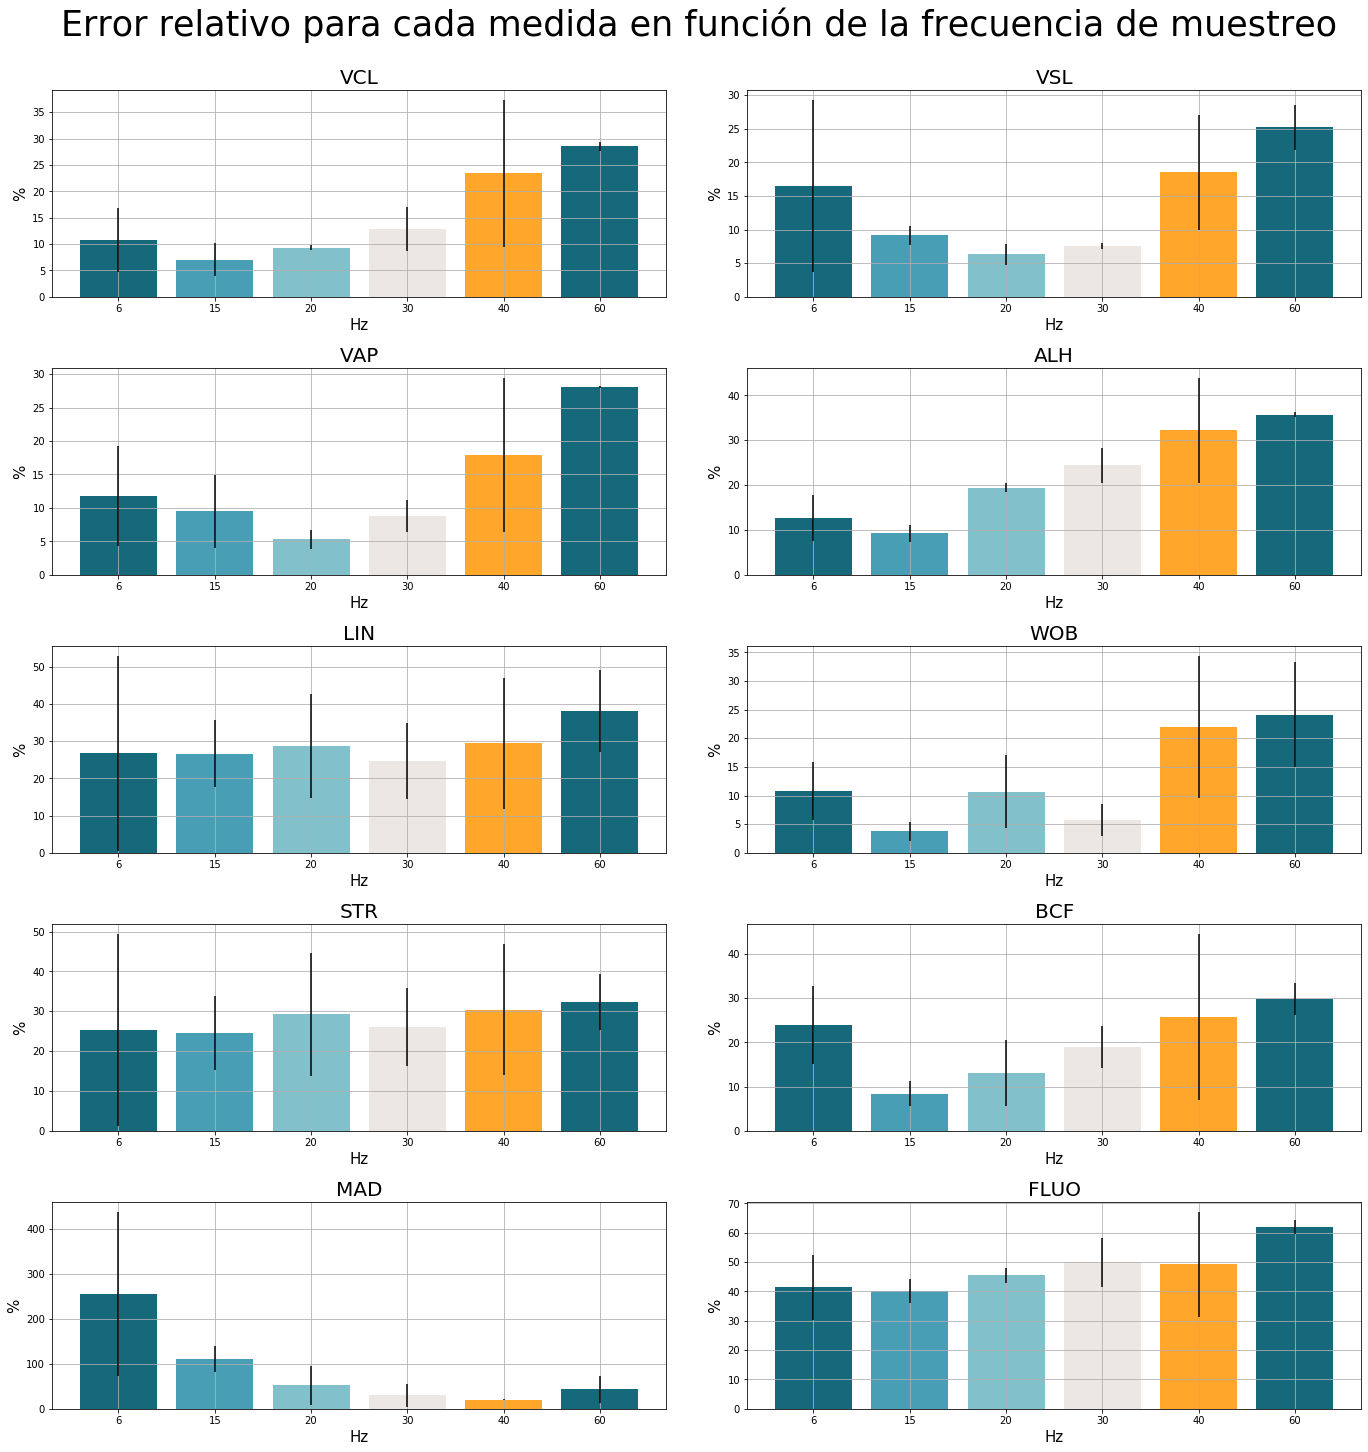

In [66]:
rows, cols = int(np.ceil((len(measures) - 1)/2)), 2
fig, axs = plt.subplots(rows, cols, figsize=(20,20))
fig.suptitle('Error relativo para cada medida en función de la frecuencia de muestreo', fontsize=35, y=1.02)
fig.tight_layout(pad=5.0)
colors = [(22/255, 105/255, 122/255), (72/255, 159/255, 181/255), (130/255, 192/255, 204/255), (237/255, 231/255, 227/255), (255/255, 166/255, 43/255)]
counter = 0
for row in range(rows):
    for col in range(cols):
        if counter < mse_error.shape[0]:
            # axs[row][col].errorbar(np.array(freqs), relative_error[counter, :, 0],
            #                        yerr=np.clip(relative_error[counter, :, 1], 0, 10),
            #                        fmt='o', markersize=10)
            axs[row][col].bar(np.array(freqs), relative_error[counter, :, 0], 
                                   yerr=relative_error[counter, :, 1], color = colors) 
            axs[row][col].grid()
            axs[row][col].set_title(measures[counter].upper(), size=20)
            axs[row][col].set_xlabel('Hz', size=15)
            axs[row][col].set_ylabel('%', size=15)
            
        counter += 1

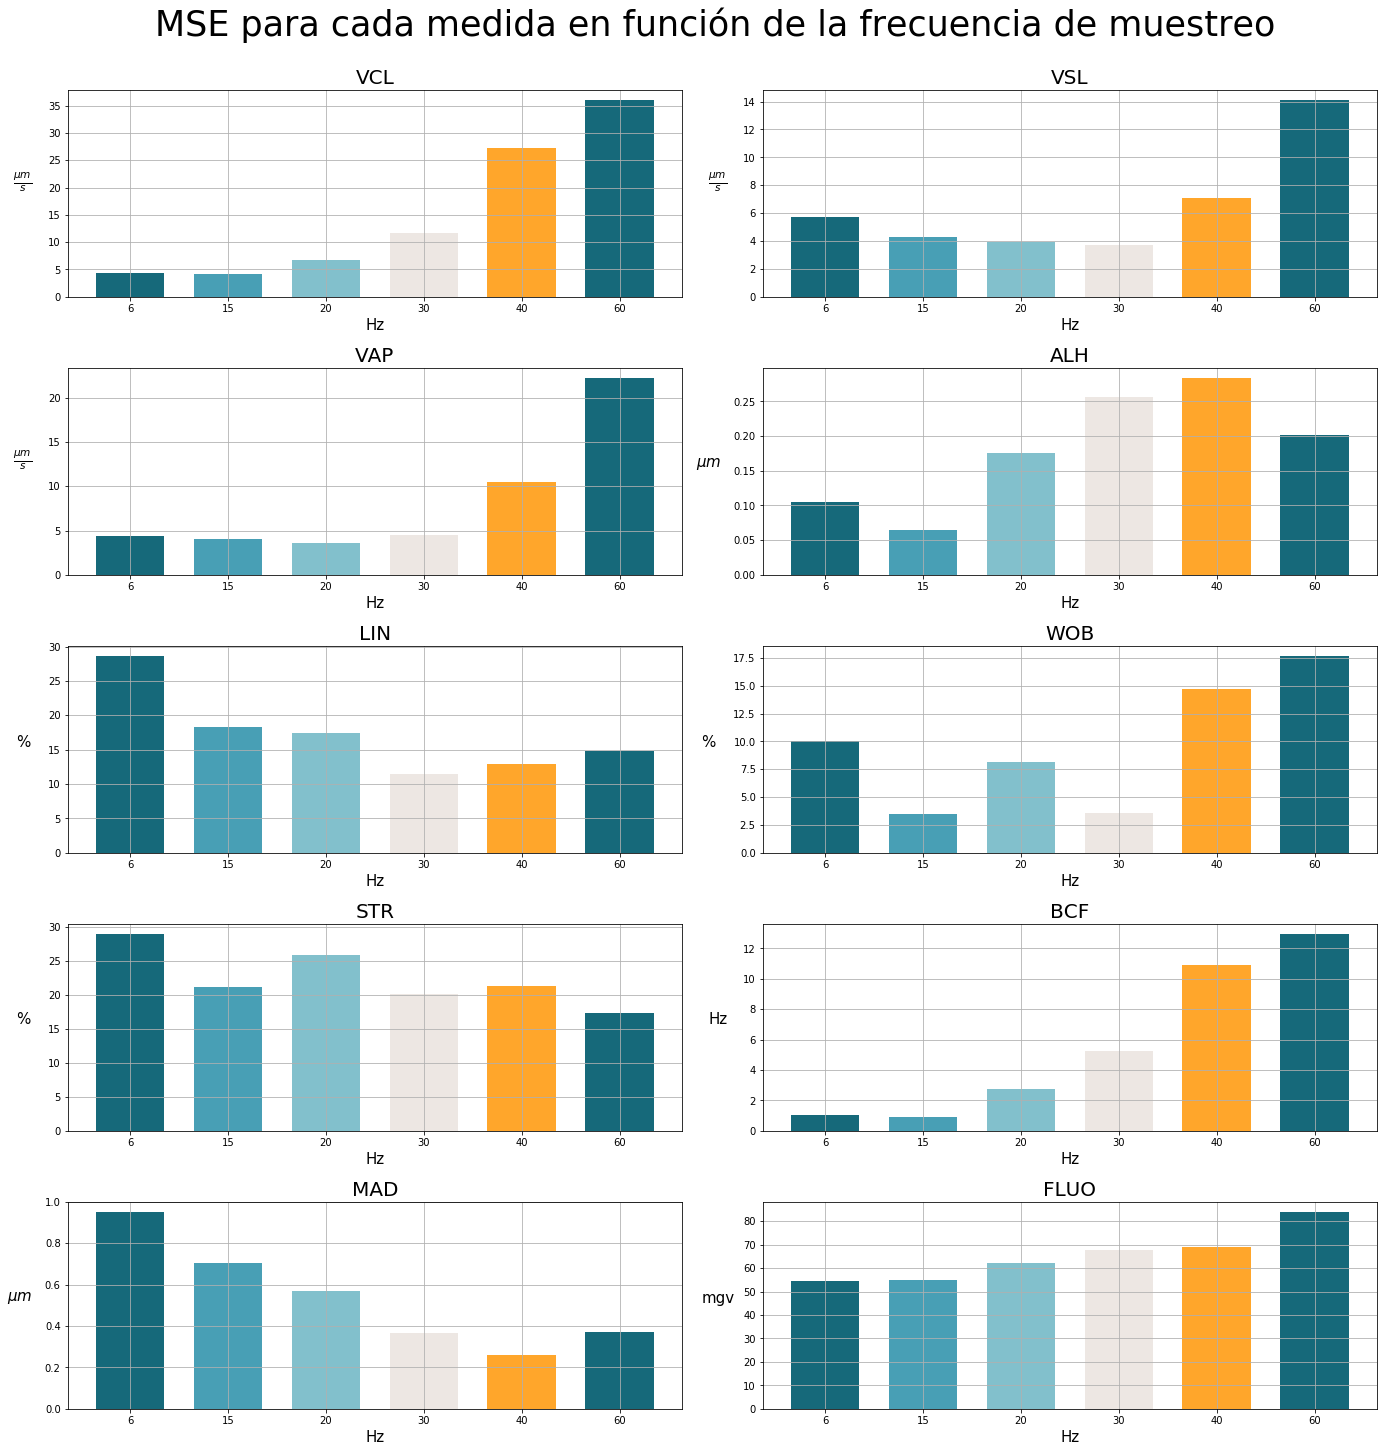

In [67]:
rows, cols = int(np.ceil((len(measures) - 1)/2)), 2
fig, axs = plt.subplots(rows, cols, figsize=(20,20))
fig.tight_layout(pad=5.0)
fig.suptitle('MSE para cada medida en función de la frecuencia de muestreo', fontsize=35, y=1.02)
fig.tight_layout(pad=5.0)
counter = 0
ylabels = [r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', 
              r'$\mu m$', '%', '%', '%', 'Hz', r'$\mu m$', 'mgv']    
percentages = ['lin', 'wob', 'str']
x = np.arange(len(freqs))
width = 0.70

for row in range(rows):
    for col in range(cols):
        if counter < mse_error.shape[0]:
            axs[row][col].set_title(measures[counter].upper(), size=20)
            if measures[counter] in percentages:
                axs[row][col].bar(np.array(freqs),100 *  mse_error[counter], width, color=colors)
            else:
                axs[row][col].bar(np.array(freqs), mse_error[counter], width, color=colors)

            axs[row][col].grid()
            axs[row][col].set_xlabel('Hz', size=15)
            axs[row][col].set_ylabel(ylabels[counter], fontsize=15, rotation=0, labelpad=25)
            
        counter += 1

# DEGRADACIÓN DE LA MEDIDA

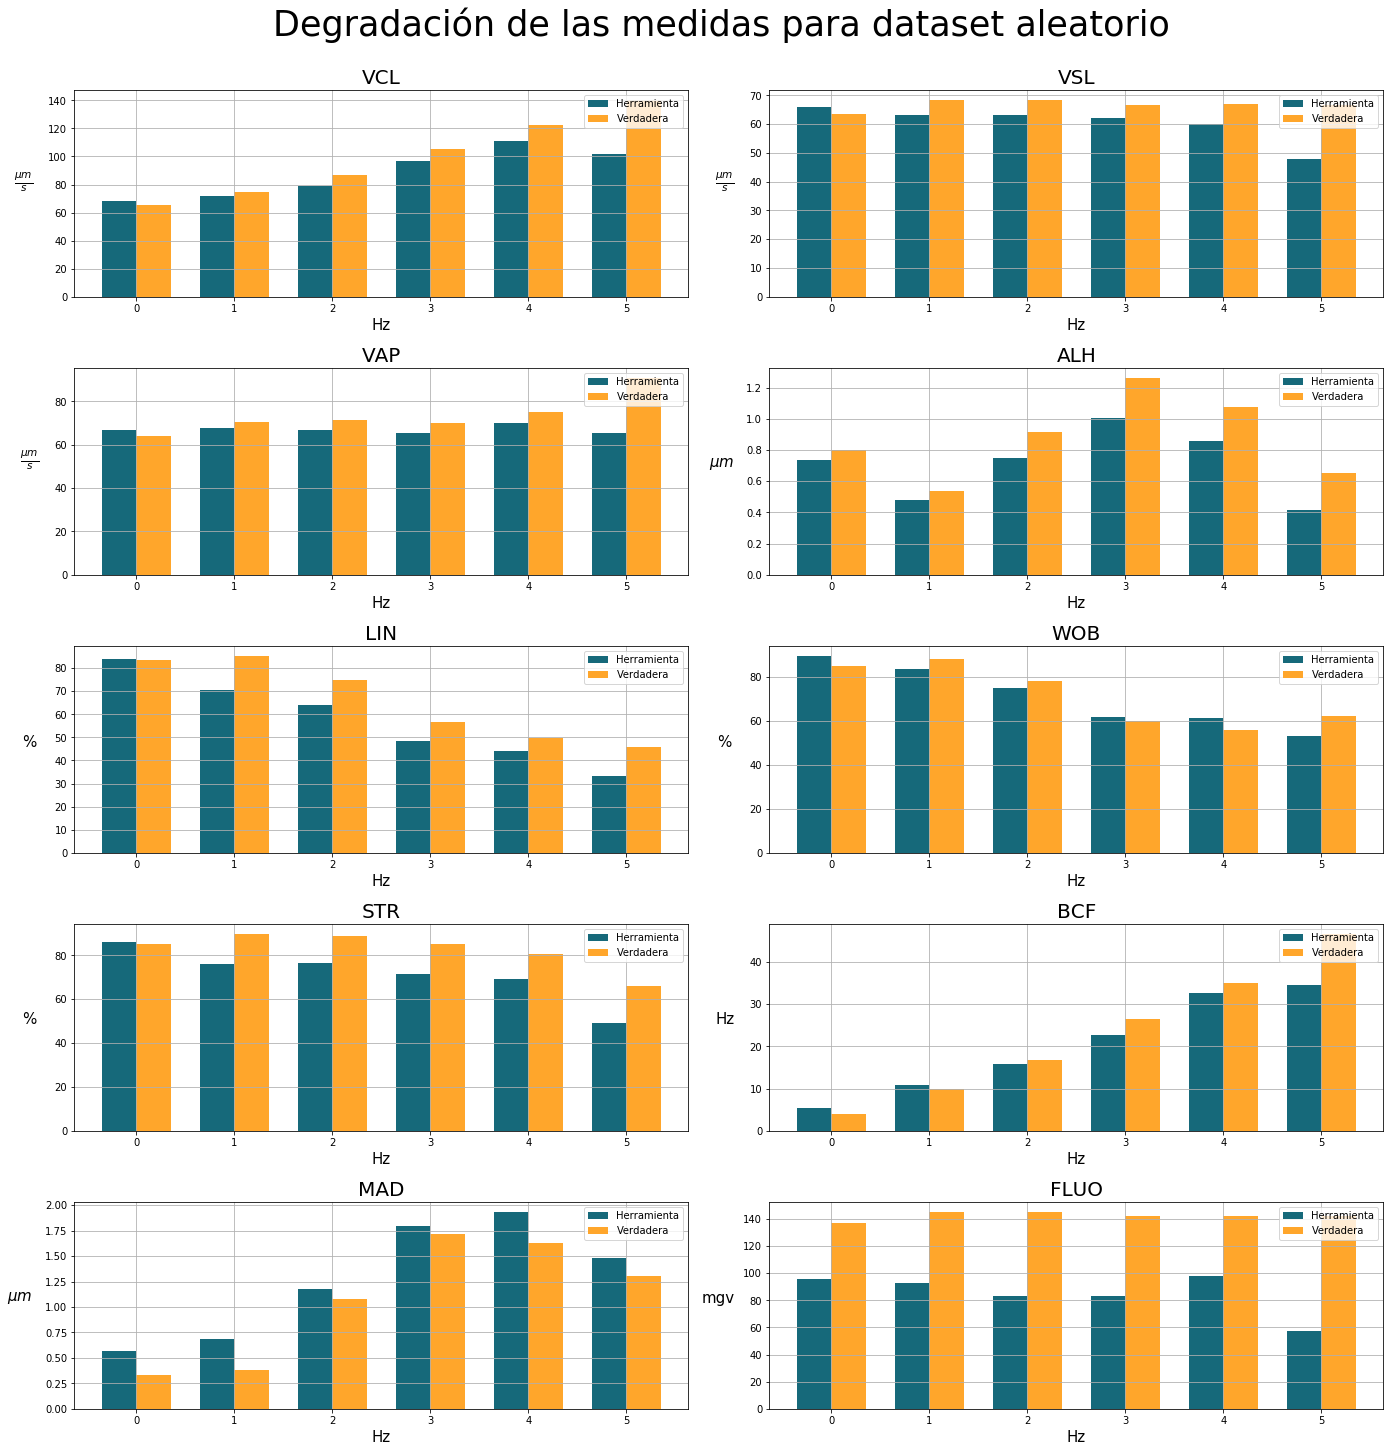

In [59]:
rows, cols = int(np.ceil((len(measures) - 1)/2)), 2
fig, axs = plt.subplots(rows, cols, figsize=(20,20))
fig.suptitle('Degradación de las medidas para dataset aleatorio', fontsize=35, y=1.02)
fig.tight_layout(pad=5.0)
counter = 0
ylabels = [r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', 
              r'$\mu m$', '%', '%', '%', 'Hz', r'$\mu m$', 'mgv']    
percentages = ['lin', 'wob', 'str']

x = np.arange(len(freqs))
width = 0.35

for row in range(rows):
    for col in range(cols):
        if counter < mse_error.shape[0]:
            axs[row][col].set_title(measures[counter].upper(), size=20)
            if measures[counter] in percentages:
                axs[row][col].bar(x - width/2, 100 * np.array(ds_measures_tr[measures[counter]]), width, color=(colors[0]))
                axs[row][col].bar(x + width/2, 100 * np.array(ds_measures_gt[measures[counter]]), width, color=(colors[1]))
            else:
                axs[row][col].bar(x - width/2, ds_measures_tr[measures[counter]], width, color=(colors[0]))
                axs[row][col].bar(x + width/2, ds_measures_gt[measures[counter]], width, color=(colors[1]))

            axs[row][col].grid()
            axs[row][col].set_xlabel('Hz', size=15)
            axs[row][col].set_ylabel(ylabels[counter], fontsize=15, rotation=0, labelpad=25)
            axs[row][col].legend(('Herramienta', 'Verdadera'), loc='upper right')
        counter += 1